In [1]:
import requests
import json
from citipy import citipy
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import time

from config import api_key

#for citipy documentations, see https://github.com/wingchen/citipy

In [2]:
#set how many pulls will be done. This is to make sure we are not overlimit

pull_number = 30
half_number = int(pull_number/2)

wait_time = int(510/pull_number)

half_number

15

In [3]:
# Down the line, we are required to split between souther and northen hemisphere for regression
# let's make it so first 50% of pull is for north, the rest of 50% is for south

#Create random latt and longitude
north_lat = []
south_lat = []

north_lon = []
south_lon = []

lat = []
lon = []


        

In [4]:
for x in range(0 , half_number):
        a = random.uniform(0,70.0)
        b = random.uniform(-70.0,70.0)
        north_lat.append(a)
        north_lon.append(b)        
        lat.append(a)
        lon.append(b)
for y in range(half_number, pull_number ):
        a = random.uniform(-70.0,-0.1)
        b = random.uniform(-70.0,70.0)
        south_lat.append(a)
        south_lon.append(b)        
        lat.append(a)
        lon.append(b) 

In [5]:
lat

[7.855194562812324,
 1.8658094043531437,
 57.31109306345901,
 38.78833932809431,
 67.07029785184545,
 37.41308845556544,
 9.242714412601853,
 53.16827168864103,
 61.08971336660014,
 3.370762091531337,
 32.398265570137966,
 2.5898823670474327,
 21.171972324271103,
 3.2705189001807144,
 66.91599541468122,
 -2.137129096884692,
 -46.23128605725115,
 -27.29738988444305,
 -39.61534537578025,
 -14.814834022776928,
 -35.65799184249646,
 -43.038239584311874,
 -63.075635079277426,
 -16.564139216053356,
 -9.590406233495571,
 -36.67359257528841,
 -30.284793038059718,
 -69.69468869558239,
 -20.048592964399845,
 -20.12187138348856]

In [6]:
#Create json pull request.

temperature = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
descriptions = []
lat_temp = []
lon_temp = []


In [9]:
#Looping the request
y = 0
a=1
#remember, set the last number in range() to limit how many request per pull.
for h in range(0,wait_time):
    for y in range(0,pull_number):

        url_lat = "http://api.openweathermap.org/data/2.5/weather?lat="+ str(lat[y]) + "&lon=" +str(lon[y]) + "&appid="+api_key +"&units=imperial"
        response = requests.get(url_lat)
        weather = response.json()
        temperature.append(weather["main"]["temp"])
        humidity.append(weather["main"]["humidity"])
        cloudiness.append(weather["clouds"]["all"])
        wind_speed.append(weather["wind"]["speed"])
        lat_temp.append(lat[y])
        lon_temp.append(lon[y])
        city = citipy.nearest_city(lat[y], lon[y])
        city_name.append(city.city_name)
        
        printout = ("#"+str(a)+" city is: " +str(city_name[y]),
                   "Temperature is: " +str(temperature[y]) + " Fahrenheit",
                    "Humidity is: " +str(humidity[y]) +" %",
                    "Cloudiness is: "+str(cloudiness[y]) +" %",
                    "Wind Speed is: "+str(wind_speed[y])  +" mph"
                   )
        a=a+1
        print(printout)
    time.sleep(70)



('#1 city is: cayenne', 'Temperature is: 81.05 Fahrenheit', 'Humidity is: 81 %', 'Cloudiness is: 89 %', 'Wind Speed is: 17.81 mph')
('#2 city is: cayenne', 'Temperature is: 81.05 Fahrenheit', 'Humidity is: 81 %', 'Cloudiness is: 89 %', 'Wind Speed is: 17.81 mph')
('#3 city is: buta', 'Temperature is: 69.53 Fahrenheit', 'Humidity is: 97 %', 'Cloudiness is: 100 %', 'Wind Speed is: 1.43 mph')
('#4 city is: uspenka', 'Temperature is: 53.73 Fahrenheit', 'Humidity is: 53 %', 'Cloudiness is: 77 %', 'Wind Speed is: 10.25 mph')
('#5 city is: ercis', 'Temperature is: 59 Fahrenheit', 'Humidity is: 67 %', 'Cloudiness is: 20 %', 'Wind Speed is: 4.36 mph')
('#6 city is: pangnirtung', 'Temperature is: 28.4 Fahrenheit', 'Humidity is: 100 %', 'Cloudiness is: 90 %', 'Wind Speed is: 12.75 mph')
('#7 city is: kalaleh', 'Temperature is: 70.12 Fahrenheit', 'Humidity is: 25 %', 'Cloudiness is: 0 %', 'Wind Speed is: 3.2 mph')
('#8 city is: carutapera', 'Temperature is: 80.44 Fahrenheit', 'Humidity is: 83 %', 

('#64 city is: uspenka', 'Temperature is: 53.73 Fahrenheit', 'Humidity is: 53 %', 'Cloudiness is: 77 %', 'Wind Speed is: 10.25 mph')
('#65 city is: ercis', 'Temperature is: 59 Fahrenheit', 'Humidity is: 67 %', 'Cloudiness is: 20 %', 'Wind Speed is: 4.36 mph')
('#66 city is: pangnirtung', 'Temperature is: 28.4 Fahrenheit', 'Humidity is: 100 %', 'Cloudiness is: 90 %', 'Wind Speed is: 12.75 mph')
('#67 city is: kalaleh', 'Temperature is: 70.12 Fahrenheit', 'Humidity is: 25 %', 'Cloudiness is: 0 %', 'Wind Speed is: 3.2 mph')
('#68 city is: carutapera', 'Temperature is: 80.44 Fahrenheit', 'Humidity is: 83 %', 'Cloudiness is: 26 %', 'Wind Speed is: 13.56 mph')
('#69 city is: yefremov', 'Temperature is: 67.5 Fahrenheit', 'Humidity is: 83 %', 'Cloudiness is: 0 %', 'Wind Speed is: 4.97 mph')
('#70 city is: hofn', 'Temperature is: 49.08 Fahrenheit', 'Humidity is: 70 %', 'Cloudiness is: 3 %', 'Wind Speed is: 3.58 mph')
('#71 city is: trairi', 'Temperature is: 81.5 Fahrenheit', 'Humidity is: 79 %'

('#127 city is: kalaleh', 'Temperature is: 70.12 Fahrenheit', 'Humidity is: 25 %', 'Cloudiness is: 0 %', 'Wind Speed is: 3.2 mph')
('#128 city is: carutapera', 'Temperature is: 80.44 Fahrenheit', 'Humidity is: 83 %', 'Cloudiness is: 26 %', 'Wind Speed is: 13.56 mph')
('#129 city is: yefremov', 'Temperature is: 67.5 Fahrenheit', 'Humidity is: 83 %', 'Cloudiness is: 0 %', 'Wind Speed is: 4.97 mph')
('#130 city is: hofn', 'Temperature is: 49.08 Fahrenheit', 'Humidity is: 70 %', 'Cloudiness is: 3 %', 'Wind Speed is: 3.58 mph')
('#131 city is: trairi', 'Temperature is: 81.5 Fahrenheit', 'Humidity is: 79 %', 'Cloudiness is: 66 %', 'Wind Speed is: 13.22 mph')
('#132 city is: marsa matruh', 'Temperature is: 72.27 Fahrenheit', 'Humidity is: 78 %', 'Cloudiness is: 0 %', 'Wind Speed is: 21.18 mph')
('#133 city is: lisala', 'Temperature is: 69.89 Fahrenheit', 'Humidity is: 93 %', 'Cloudiness is: 100 %', 'Wind Speed is: 1.41 mph')
('#134 city is: sur', 'Temperature is: 83.95 Fahrenheit', 'Humidity 

('#191 city is: trairi', 'Temperature is: 81.5 Fahrenheit', 'Humidity is: 79 %', 'Cloudiness is: 66 %', 'Wind Speed is: 13.22 mph')
('#192 city is: marsa matruh', 'Temperature is: 72.27 Fahrenheit', 'Humidity is: 78 %', 'Cloudiness is: 0 %', 'Wind Speed is: 21.18 mph')
('#193 city is: lisala', 'Temperature is: 69.89 Fahrenheit', 'Humidity is: 93 %', 'Cloudiness is: 100 %', 'Wind Speed is: 1.41 mph')
('#194 city is: sur', 'Temperature is: 83.95 Fahrenheit', 'Humidity is: 87 %', 'Cloudiness is: 36 %', 'Wind Speed is: 16.35 mph')
('#195 city is: buta', 'Temperature is: 68 Fahrenheit', 'Humidity is: 98 %', 'Cloudiness is: 98 %', 'Wind Speed is: 0.98 mph')
('#196 city is: sisimiut', 'Temperature is: 34.07 Fahrenheit', 'Humidity is: 91 %', 'Cloudiness is: 34 %', 'Wind Speed is: 15.3 mph')
('#197 city is: tabou', 'Temperature is: 74.68 Fahrenheit', 'Humidity is: 90 %', 'Cloudiness is: 0 %', 'Wind Speed is: 11.34 mph')
('#198 city is: necochea', 'Temperature is: 49.23 Fahrenheit', 'Humidity is

('#254 city is: sur', 'Temperature is: 83.95 Fahrenheit', 'Humidity is: 87 %', 'Cloudiness is: 36 %', 'Wind Speed is: 16.35 mph')
('#255 city is: buta', 'Temperature is: 68 Fahrenheit', 'Humidity is: 98 %', 'Cloudiness is: 98 %', 'Wind Speed is: 0.98 mph')
('#256 city is: sisimiut', 'Temperature is: 34.07 Fahrenheit', 'Humidity is: 91 %', 'Cloudiness is: 34 %', 'Wind Speed is: 15.3 mph')
('#257 city is: tabou', 'Temperature is: 74.68 Fahrenheit', 'Humidity is: 90 %', 'Cloudiness is: 0 %', 'Wind Speed is: 11.34 mph')
('#258 city is: necochea', 'Temperature is: 49.23 Fahrenheit', 'Humidity is: 80 %', 'Cloudiness is: 100 %', 'Wind Speed is: 8.99 mph')
('#259 city is: vila velha', 'Temperature is: 64.36 Fahrenheit', 'Humidity is: 59 %', 'Cloudiness is: 8 %', 'Wind Speed is: 12.82 mph')
('#260 city is: cape town', 'Temperature is: 65.89 Fahrenheit', 'Humidity is: 71 %', 'Cloudiness is: 100 %', 'Wind Speed is: 22.48 mph')
('#261 city is: georgetown', 'Temperature is: 73.27 Fahrenheit', 'Humi

('#318 city is: necochea', 'Temperature is: 49.23 Fahrenheit', 'Humidity is: 80 %', 'Cloudiness is: 100 %', 'Wind Speed is: 8.99 mph')
('#319 city is: vila velha', 'Temperature is: 64.36 Fahrenheit', 'Humidity is: 59 %', 'Cloudiness is: 8 %', 'Wind Speed is: 12.82 mph')
('#320 city is: cape town', 'Temperature is: 65.89 Fahrenheit', 'Humidity is: 71 %', 'Cloudiness is: 100 %', 'Wind Speed is: 22.48 mph')
('#321 city is: georgetown', 'Temperature is: 73.27 Fahrenheit', 'Humidity is: 65 %', 'Cloudiness is: 19 %', 'Wind Speed is: 7.94 mph')
('#322 city is: tsihombe', 'Temperature is: 60.48 Fahrenheit', 'Humidity is: 79 %', 'Cloudiness is: 78 %', 'Wind Speed is: 13.89 mph')
('#323 city is: arraial do cabo', 'Temperature is: 47.21 Fahrenheit', 'Humidity is: 77 %', 'Cloudiness is: 100 %', 'Wind Speed is: 9.69 mph')
('#324 city is: ushuaia', 'Temperature is: 19.51 Fahrenheit', 'Humidity is: 97 %', 'Cloudiness is: 95 %', 'Wind Speed is: 13.24 mph')
('#325 city is: belmonte', 'Temperature is: 7

('#382 city is: tsihombe', 'Temperature is: 60.48 Fahrenheit', 'Humidity is: 79 %', 'Cloudiness is: 78 %', 'Wind Speed is: 13.89 mph')
('#383 city is: arraial do cabo', 'Temperature is: 47.21 Fahrenheit', 'Humidity is: 77 %', 'Cloudiness is: 100 %', 'Wind Speed is: 9.69 mph')
('#384 city is: ushuaia', 'Temperature is: 19.51 Fahrenheit', 'Humidity is: 97 %', 'Cloudiness is: 95 %', 'Wind Speed is: 13.24 mph')
('#385 city is: belmonte', 'Temperature is: 75.94 Fahrenheit', 'Humidity is: 79 %', 'Cloudiness is: 33 %', 'Wind Speed is: 23.76 mph')
('#386 city is: bom jesus', 'Temperature is: 72.84 Fahrenheit', 'Humidity is: 54 %', 'Cloudiness is: 45 %', 'Wind Speed is: 7.52 mph')
('#387 city is: souillac', 'Temperature is: 56.8 Fahrenheit', 'Humidity is: 77 %', 'Cloudiness is: 99 %', 'Wind Speed is: 29.8 mph')
('#388 city is: jamestown', 'Temperature is: 58.75 Fahrenheit', 'Humidity is: 57 %', 'Cloudiness is: 79 %', 'Wind Speed is: 16.44 mph')
('#389 city is: cape town', 'Temperature is: -22.3

('#446 city is: bom jesus', 'Temperature is: 72.84 Fahrenheit', 'Humidity is: 54 %', 'Cloudiness is: 45 %', 'Wind Speed is: 7.52 mph')
('#447 city is: souillac', 'Temperature is: 56.8 Fahrenheit', 'Humidity is: 77 %', 'Cloudiness is: 99 %', 'Wind Speed is: 29.8 mph')
('#448 city is: jamestown', 'Temperature is: 58.75 Fahrenheit', 'Humidity is: 57 %', 'Cloudiness is: 79 %', 'Wind Speed is: 16.44 mph')
('#449 city is: cape town', 'Temperature is: -22.34 Fahrenheit', 'Humidity is: 87 %', 'Cloudiness is: 12 %', 'Wind Speed is: 5.44 mph')
('#450 city is: saint-paul', 'Temperature is: 72.34 Fahrenheit', 'Humidity is: 75 %', 'Cloudiness is: 73 %', 'Wind Speed is: 26.8 mph')
('#451 city is: cayenne', 'Temperature is: 81.05 Fahrenheit', 'Humidity is: 81 %', 'Cloudiness is: 89 %', 'Wind Speed is: 17.81 mph')
('#452 city is: cayenne', 'Temperature is: 81.05 Fahrenheit', 'Humidity is: 81 %', 'Cloudiness is: 89 %', 'Wind Speed is: 17.81 mph')
('#453 city is: buta', 'Temperature is: 69.53 Fahrenheit

('#508 city is: jamestown', 'Temperature is: 58.75 Fahrenheit', 'Humidity is: 57 %', 'Cloudiness is: 79 %', 'Wind Speed is: 16.44 mph')
('#509 city is: cape town', 'Temperature is: -22.34 Fahrenheit', 'Humidity is: 87 %', 'Cloudiness is: 12 %', 'Wind Speed is: 5.44 mph')
('#510 city is: saint-paul', 'Temperature is: 72.34 Fahrenheit', 'Humidity is: 75 %', 'Cloudiness is: 73 %', 'Wind Speed is: 26.8 mph')


In [53]:
wind_speed[0:5]

[17.81, 17.81, 1.43, 10.25, 4.36]

In [54]:



full_p = pd.DataFrame(list(zip( city_name, temperature, humidity, cloudiness, wind_speed )) , columns = ["City Name","Temperature (F)", "Humidity %", "CLoudiness %", "Wind Speed (mph)"])

path_csv = (r"output/city_desc2.csv")

full_p.head()

,City Name,Temperature (F),Humidity %,CLoudiness %,Wind Speed (mph)
0,cayenne,81.05,81,89,17.81
1,cayenne,81.05,81,89,17.81
2,buta,69.53,97,100,1.43
3,uspenka,53.73,53,77,10.25
4,ercis,59.00,67,20,4.36


In [55]:
full_p.to_csv(path_csv)

In [29]:
# fill this cell with writing output to CSV
ind = np.arange(0,len(descriptions) )
city_out = pd.DataFrame({"City Prints": descriptions,
             "Index":ind}).set_index("Index")
out_path = ("output/city_desc.csv")
city_out.to_csv(out_path)

In [30]:
#cells above requires pull. Be wary of doing too many pulls!


This scatter plot is trying to find relationship between latitude to temperature (F)


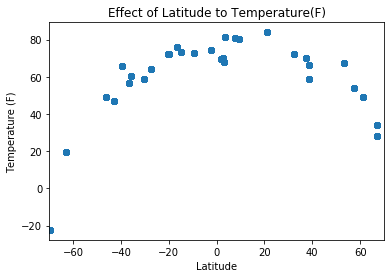

In [31]:
#Create Scatter Plot 1
#Temperature (F) vs Latitude 





plt.scatter(x = lat_temp, y=temperature)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Effect of Latitude to Temperature(F)")
plt.xlim(-70,70)
plt.savefig("output/scatter1")

print("This scatter plot is trying to find relationship between latitude to temperature (F)")

This scatter plot is trying to find relationship between latitude to humidity


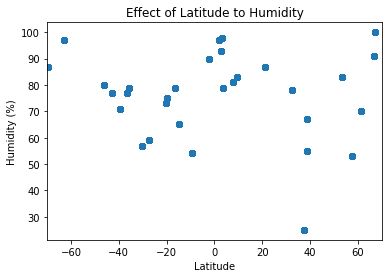

In [32]:
#Create Scatter Plot 2
#Humidity (%) vs Latitude
plt.scatter(x = lat_temp, y=humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Effect of Latitude to Humidity")
plt.xlim(-70,70)
plt.savefig("output/scatter2")
print("This scatter plot is trying to find relationship between latitude to humidity")

This scatter plot is trying to find relationship between latitude to cloudiness


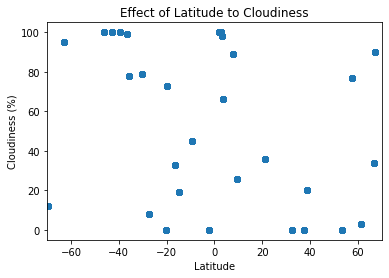

In [58]:
#Create Scatter Plot 3
#Cloudiness (%) vs Latitude
plt.scatter(x = lat_temp, y=cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Effect of Latitude to Cloudiness")
plt.xlim(-70,70)
plt.savefig("output/scatter3")
print("This scatter plot is trying to find relationship between latitude to cloudiness")

This scatter plot is trying to find relationship between latitude to wind speed


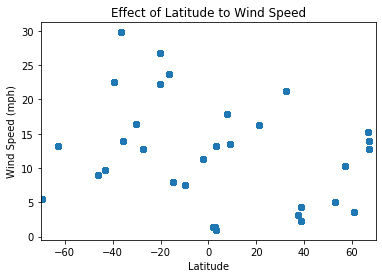

In [59]:
#Create Scatter Plot 4
#Wind Speed vs Latitude
plt.scatter(x = lat_temp, y=wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Effect of Latitude to Wind Speed")
plt.xlim(-70,70)
plt.savefig("output/scatter4")
print("This scatter plot is trying to find relationship between latitude to wind speed")

In [35]:
#Automated
#The values stored in n_values and s_values are temperature, humidity, cloud, and wind speed. In that order!
explanation = ["Temperature", "Humidity","Cloudiness","Wind Speed"]

n_values = []
s_values = []

#This is to make the latitude usable 
north_lat = np.asarray(north_lat)
south_lat = np.asarray(south_lat)



In [36]:
#The North Loop. Basically, we add list of list

a=[]
for j in range (0,half_number):
    a.append(temperature[j] )
n_values.append(a)

a=[]
for j in range (0,half_number):
    a.append(humidity[j] )
n_values.append(a)

a=[]
for j in range (0,half_number):
    a.append(cloudiness[j] )
n_values.append(a)

a=[]
for j in range (0,half_number):
    a.append(wind_speed[j] )
n_values.append(a)

#for i in range (0, half_number):
#    n_values.append(humidity[i] )
   # n_values.append (cloudiness[i] )
    #n_values.append (wind_speed[i])


In [37]:
#The South Loop
a=[]
for j in range (half_number, pull_number):
    a.append(temperature[j] )
s_values.append(a)

a=[]
for j in range (half_number, pull_number):
    a.append(humidity[j] )
s_values.append(a)

a=[]
for j in range (half_number, pull_number):
    a.append(cloudiness[j] )
s_values.append(a)

a=[]
for j in range (half_number, pull_number):
    a.append(wind_speed[j] )
s_values.append(a)



In [38]:
n_values

[[81.05,
  81.05,
  69.53,
  53.73,
  59,
  28.4,
  70.12,
  80.44,
  67.5,
  49.08,
  81.5,
  72.27,
  69.89,
  83.95,
  68],
 [81, 81, 97, 53, 67, 100, 25, 83, 83, 70, 79, 78, 93, 87, 98],
 [89, 89, 100, 77, 20, 90, 0, 26, 0, 3, 66, 0, 100, 36, 98],
 [17.81,
  17.81,
  1.43,
  10.25,
  4.36,
  12.75,
  3.2,
  13.56,
  4.97,
  3.58,
  13.22,
  21.18,
  1.41,
  16.35,
  0.98]]

In [39]:
#North Linregress Loop
#again, in order the value is correlation between latitude and : temperature, humidity, cloudiness, wind speed 

slope_n=[]
intercept_n =[]
rvalue_n=[]
pvalue_n=[]
stderr_n=[]
n_regress = []
n_desc = []

for i in range(0,len(n_values) ):
    
    slope_1, intercept_1, rvalue_1, pvalue_1, stderr_1 = st.linregress(north_lat, n_values[i])
    slope_n.append(slope_1)
    reg1 = intercept_1 + slope_1 * north_lat
    desc1 = "y =" + str(round(intercept_1,3)) + "+ "+ str(round(slope_1,3)) + "x"
    n_regress.append(reg1)
    n_desc.append(desc1)


In [40]:
n_desc[0]

'y =71.643+ -0.128x'

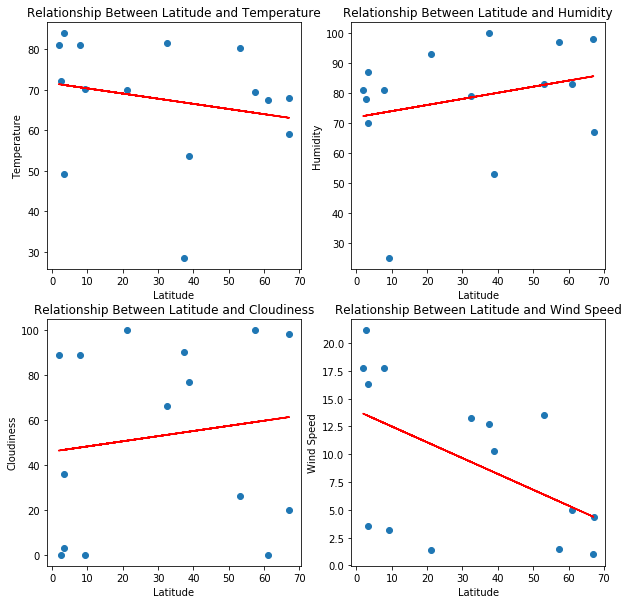

In [60]:
#automatically create subplots and regressions line

fig_n, axs = plt.subplots(2 , 2 , figsize = (10,10))
c=0

for a in range(0,2):
    for b in range(0, 2):
        axs[a,b].scatter(north_lat,n_values[c])
        axs[a,b].plot(north_lat,n_regress[c], color="red")
        axs[a,b].set_title("Relationship Between Latitude and "+explanation[c])
        axs[a,b].set_xlabel("Latitude")
        axs[a,b].set_ylabel(explanation[c])
        c = c +1
plt.savefig("output/scatter5")

In [42]:
#South Linregress Loop
#again, in order the value is correlation between latitude and : temperature, humidity, cloudiness, wind speed 

slope_s=[]
intercept_s =[]
rvalue_s=[]
pvalue_s=[]
stderr_s=[]
s_regress = []
s_desc = []

for i in range(0,len(n_values) ):
    
    slope_2, intercept_2, rvalue_2, pvalue_2, stderr_2 = st.linregress(south_lat, s_values[i])
    slope_s.append(slope_2)
    reg2 = intercept_2 + slope_2 * south_lat
    desc2 = "y =" + str(round(intercept_1,3)) + "+ "+ str(round(slope_1,3)) + "x"
    s_regress.append(reg2)
    s_desc.append(desc2)

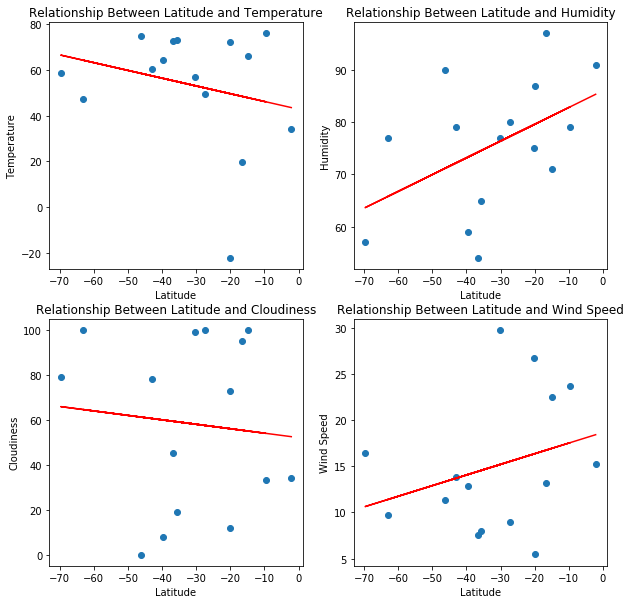

In [61]:
#automatically create subplots and regressions line

fig_s, axs2 = plt.subplots(2 , 2 , figsize = (10,10))
c=0

for a in range(0,2):
    for b in range(0, 2):
        axs2[a,b].scatter(south_lat,s_values[c])
        axs2[a,b].plot(south_lat,s_regress[c], color="red")
        axs2[a,b].set_title("Relationship Between Latitude and "+explanation[c])
        axs2[a,b].set_xlabel("Latitude")
        axs2[a,b].set_ylabel(explanation[c])
        c = c +1
plt.savefig("output/scatter6")

In [44]:
#comments coming soon!